# Comprehensive Treatment Pattern Analysis

This notebook demonstrates the complete pipeline combining:
1. Age-matched feature building
2. Observational pattern learning with matched controls
3. Bayesian propensity-response modeling

Author: Sarah Urbut  
Date: 2025-07-15

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load Data

Load your signature data, patient IDs, prescription data, and covariates.

In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append('scripts')
thetas = np.load("/Users/sarahurbut/aladynoulli2/pyScripts/thetas.npy")
processed_ids = np.load("/Users/sarahurbut/aladynoulli2/pyScripts/processed_patient_ids.npy").astype(int)
cov = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/matched_pce_df_400k.csv')


cov.columns = cov.columns.str.strip()
cov = cov.rename(columns={cov.columns[0]: 'eid'})
cov['eid'] = cov['eid'].astype(int)



  # Create covariate dict
covariate_dicts = {'age': dict(zip(cov['eid'], 2025 - cov['birth_year']))}



In [ ]:
import torch
Y=torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/Y_tensor.pt')
Y.shape


disease_names=essentials['disease_names']

NameError: name 'essentials' is not defined

In [4]:

# thetas: shape (N, n_signatures, n_timepoints)
mean_thetas = thetas.mean(axis=0)  # shape: (n_signatures, n_timepoints)
std_thetas = thetas.std(axis=0)    # shape: (n_signatures, n_timepoints)

# Broadcasting: (N, n_signatures, n_timepoints) - (n_signatures, n_timepoints)
z_thetas = (thetas - mean_thetas[None, :, :]) / std_thetas[None, :, :]

# statins = pd.read_csv('path/to/your/statin_prescriptions.csv')
# Load covariate data (demographics, labs, etc.)
cov = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/matched_pce_df_400k.csv')
cov.columns = cov.columns.str.strip()
cov = cov.rename(columns={cov.columns[0]: 'eid'})
cov['eid'] = cov['eid'].astype(int)

def simple_gp_check(gp_scripts):
    """
    Very basic check of GP scripts data to avoid type errors
    """
    print("=== Simple GP Scripts Check ===\n")
    
    # Basic shape info
    print(f"Data shape: {gp_scripts.shape}")
    print(f"Columns: {list(gp_scripts.columns)}")
    
    # Check data types
    print(f"\nData types:")
    print(gp_scripts.dtypes)
    
    # Check for missing values
    print(f"\nMissing values:")
    missing = gp_scripts.isnull().sum()
    for col, count in missing.items():
        if count > 0:
            print(f"  {col}: {count}")
    
    # Sample of data
    print(f"\nFirst few rows:")
    print(gp_scripts.head())
    
    # Unique patients
    print(f"\nUnique patients: {gp_scripts['eid'].nunique()}")
    
    return gp_scripts
def find_statins_basic(gp_scripts):
    """
    Basic statin search avoiding type comparison issues
    """
    print("\n=== Basic Statin Search ===\n")
    
    df = gp_scripts.copy()
    
    # Convert to strings safely
    df['drug_name_str'] = df['drug_name'].astype(str)
    df['bnf_code_str'] = df['bnf_code'].astype(str)
    
    # Search for statin keywords in drug names
    statin_keywords = ['statin', 'atorva', 'simva', 'rosuva', 'prava', 'fluva']
    
    statin_mask = False
    for keyword in statin_keywords:
        keyword_mask = df['drug_name_str'].str.contains(keyword, case=False, na=False)
        statin_mask = statin_mask | keyword_mask
        if keyword_mask.sum() > 0:
            print(f"Found {keyword_mask.sum()} prescriptions containing '{keyword}'")
    
    # Search for lipid-related BNF codes
    bnf_patterns = ['2.12', '02.12', '212']
    bnf_mask = False
    for pattern in bnf_patterns:
        pattern_mask = df['bnf_code_str'].str.contains(pattern, na=False)
        bnf_mask = bnf_mask | pattern_mask
        if pattern_mask.sum() > 0:
            print(f"Found {pattern_mask.sum()} prescriptions with BNF pattern '{pattern}'")
    
    # Combine results
    all_statin_mask = statin_mask | bnf_mask
    statins = df[all_statin_mask].copy()
    
    print(f"\nTotal potential statin prescriptions: {len(statins)}")
    
    if len(statins) > 0:
        print(f"Unique patients with statins: {statins['eid'].nunique()}")
        
        # Show sample
        print(f"\nSample statin prescriptions:")
        sample_cols = ['eid', 'issue_date', 'drug_name', 'bnf_code']
        print(statins[sample_cols].head(10))
        
        # Most common statin drugs
        print(f"\nMost common statin drugs:")
        top_drugs = statins['drug_name'].value_counts().head(5)
        for drug, count in top_drugs.items():
            print(f"  {drug}: {count}")
    
    else:
        print("No obvious statins found")
        
        # Show what we do have
        print(f"\nSample of all drug names:")
        print(df['drug_name'].head(10).tolist())
        
        print(f"\nSample of all BNF codes:")
        print(df['bnf_code'].head(10).tolist())
    
    return statins

# Simple function to run
def basic_analysis(gp_scripts):
    """
    Run basic analysis without type errors
    """
    # Basic check
    df = simple_gp_check(gp_scripts)
    
    # Find statins
    statins = find_statins_basic(df)
    
    return df, statins

# Usage:
prescription_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/gp_scripts.txt'
gp_scripts = pd.read_csv(prescription_path, sep='\t')
gp_scripts = simple_gp_check(gp_scripts)
df, statins = basic_analysis(gp_scripts)

# For this example, assuming you already have these loaded:
# thetas, processed_ids, statins, cov

print(f"Signature data shape: {thetas.shape}")
print(f"Number of processed patients: {len(processed_ids)}")
print(f"Number of prescription records: {len(statins)}")
print(f"Number of patients with covariates: {len(cov)}")

=== Simple GP Scripts Check ===

Data shape: (56212343, 8)
Columns: ['eid', 'data_provider', 'issue_date', 'read_2', 'bnf_code', 'dmd_code', 'drug_name', 'quantity']

Data types:
eid                int64
data_provider      int64
issue_date        object
read_2            object
bnf_code          object
dmd_code         float64
drug_name         object
quantity          object
dtype: object

Missing values:
  issue_date: 6091
  read_2: 42056239
  bnf_code: 13189321
  dmd_code: 50300279
  drug_name: 7228777
  quantity: 7275923

First few rows:
       eid  data_provider  issue_date read_2        bnf_code  dmd_code  \
0  1000015              3  14/06/2005    NaN  06.03.02.00.00       NaN   
1  1000015              3  28/07/2014    NaN  05.01.01.03.00       NaN   
2  1000015              3  10/09/2009    NaN  05.01.01.02.00       NaN   
3  1000015              3  15/12/2004    NaN  03.01.01.03.00       NaN   
4  1000015              3  15/12/2004    NaN  03.02.00.00.00       NaN   

       

In [29]:
# Import the comprehensive analysis module
import sys
sys.path.append('scripts')
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Clean and Prepare Statin Data

In [204]:
# Clean up the statin data - remove non-statins
true_statins = statins[statins['drug_name'].str.contains(
    'simvastatin|atorvastatin|rosuvastatin|pravastatin|fluvastatin|lovastatin', 
    case=False, na=False
)].copy()

print(f"Total prescription records: {len(statins)}")
print(f"True statins after filtering: {len(true_statins)}")
print(f"Unique patients with true statins: {true_statins['eid'].nunique()}")

# Show distribution of statin types
if len(true_statins) > 0:
    statin_counts = true_statins['drug_name'].value_counts().head(10)
    print("\nTop 10 statin types:")
    print(statin_counts)


true_statins.to_csv('true_statins.csv', index=False)
cov.to_csv('cov.csv', index=False)

# Then load with:
true_statins = pd.read_csv('true_statins.csv')
cov = pd.read_csv('cov.csv')


prescription_patient_ids = set(gp_scripts['eid'].unique())

  # Save this set for fast loading (optional)
np.save('prescription_patient_ids.npy', np.array(list(prescription_patient_ids)))

Total prescription records: 3891973
True statins after filtering: 3584756
Unique patients with true statins: 70329

Top 10 statin types:
drug_name
Simvastatin 40mg tablets     1203845
Simvastatin 20mg tablets      535753
Atorvastatin 20mg tablets     331045
Atorvastatin 10mg tablets     283735
Atorvastatin 40mg tablets     272954
Simvastatin 10mg tablets      135675
Atorvastatin 80mg tablets      92158
SIMVASTATIN tabs 40mg          66184
Pravastatin 40mg tablets       65840
Rosuvastatin 10mg tablets      57566
Name: count, dtype: int64


## 3. Prepare Covariate Dictionary for Matching

In [6]:
import torch as torch
from dt import *
cov = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/matched_pce_df_400k.csv')
cov.columns = cov.columns.str.strip()
cov = cov.rename(columns={cov.columns[0]: 'eid'})
cov['eid'] = cov['eid'].astype(int)
# Parse enrollment date and calculate age at enrollment
cov['enrollment'] = pd.to_datetime(cov['Enrollment_Date'], errors='coerce')
cov['age_at_enroll'] = cov['enrollment'].dt.year - cov['birth_year']
age_at_enroll = dict(zip(cov['eid'], cov['age_at_enroll']))
eid_to_yob = dict(zip(cov['eid'], cov['birth_year']))
# Create covariate dictionary for matching
covariate_dicts = {}

# Load PRS names and labels for plotting/interpretation
prs_names = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/prs_names_with_head.csv')
prs_labels = prs_names['Names'].tolist()

# Load disease names for reference
# (Assumes second column contains names)
disease_names_df = pd.read_csv("/Users/sarahurbut/aladynoulli2/pyScripts/disease_names.csv")
disease_names = disease_names_df.iloc[:, 1].tolist()

# Load G-matrix (genotype/PRS matrix)
G = torch.load("/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/G_matrix.pt")
G = G.detach().cpu().numpy()

# Load covariate data (demographics, labs, etc.)
cov = pd.read_csv('/Users/sarahurbut/aladynoulli2/pyScripts/matched_pce_df_400k.csv')
cov.columns = cov.columns.str.strip()
cov = cov.rename(columns={cov.columns[0]: 'eid'})
cov['eid'] = cov['eid'].astype(int)
# Parse enrollment date and calculate age at enrollment
cov['enrollment'] = pd.to_datetime(cov['Enrollment_Date'], errors='coerce')
cov['age_at_enroll'] = cov['enrollment'].dt.year - cov['birth_year']
age_at_enroll = dict(zip(cov['eid'], cov['age_at_enroll']))
eid_to_yob = dict(zip(cov['eid'], cov['birth_year']))


# 7. Add prior disease/condition flags to covariate table
# ---------------------------------------------
# These functions flag prior disease status at enrollment for each subject
prev_condition(cov, 'Dm_Any', 'Dm_censor_age', 'age_enrolled', 'prev_dm')
prev_condition(cov, 'DmT1_Any', 'DmT1_censor_age', 'age_enrolled', 'prev_dm1')
prev_condition(cov, 'Ht_Any', 'Ht_censor_age', 'age_enrolled', 'prev_ht')
prev_condition(cov, 'HyperLip_Any', 'HyperLip_censor_age', 'age_enrolled', 'prev_hl')
prev_condition(cov, 'Cad_Any', 'Cad_censor_age', 'age_enrolled', 'prev_cad')
# ---------------------------------------------
# 8. Build mapping dictionaries for covariates and PRS
# ---------------------------------------------
ldl_idx = prs_labels.index('LDL_SF')   # LDL PRS index
cad_idx = prs_labels.index('CAD')      # CAD PRS index
eid_to_dm2_prev = dict(zip(cov['eid'], cov['prev_dm']))
eid_to_antihtnbase = dict(zip(cov['eid'], cov['prev_ht']))
eid_to_htn = dict(zip(cov['eid'], cov['prev_ht']))
eid_to_smoke = dict(zip(cov['eid'], cov['SmokingStatusv2']))
eid_to_dm1_prev = dict(zip(cov['eid'], cov['prev_dm1']))
eid_to_hl_prev = dict(zip(cov['eid'], cov['prev_hl']))
eid_to_sex = dict(zip(cov['eid'],cov['Sex']))
eid_to_age = dict(zip(cov['eid'],cov['age_enrolled']))
eid_to_ldl_prs = {eid: G[i, ldl_idx] for i, eid in enumerate(processed_ids)}
eid_to_cad_prs = {eid: G[i, cad_idx] for i, eid in enumerate(processed_ids)}
eid_to_race = dict(zip(cov['eid'],cov['race']))
eid_to_pce_goff = dict(zip(cov['eid'],cov['pce_goff']))
eid_to_tchol = dict(zip(cov['eid'],cov['tchol']))
eid_to_hdl = dict(zip(cov['eid'],cov['hdl']))
eid_to_sbp = dict(zip(cov['eid'],cov['SBP']))
# Add these disease mapping dictionaries
eid_to_cad_any = dict(zip(cov['eid'], cov['Cad_Any']))
eid_to_cad_censor_age = dict(zip(cov['eid'], cov['Cad_censor_age']))
eid_to_dm_any = dict(zip(cov['eid'], cov['Dm_Any']))
eid_to_dm_censor_age = dict(zip(cov['eid'], cov['Dm_censor_age']))
eid_to_ht_any = dict(zip(cov['eid'], cov['Ht_Any']))
eid_to_ht_censor_age = dict(zip(cov['eid'], cov['Ht_censor_age']))
eid_to_hyperlip_any = dict(zip(cov['eid'], cov['HyperLip_Any']))
eid_to_hyperlip_censor_age = dict(zip(cov['eid'], cov['HyperLip_censor_age']))



# Fix your covariate_dicts first:
covariate_dicts = {
    'age_at_enroll': eid_to_age,
    'sex': eid_to_sex,
    'dm2_prev': eid_to_dm2_prev,
    'antihtnbase': eid_to_antihtnbase,
    'dm1_prev': eid_to_dm1_prev,  # Fix: was eid_to_hl_prev
    'smoke': eid_to_smoke,
    'ldl_prs': eid_to_ldl_prs,
    'cad_prs': eid_to_cad_prs,
    'tchol': eid_to_tchol,
    'hdl': eid_to_hdl,
    'SBP': eid_to_sbp,  # Fix: was 'sbp' (lowercase)
    'pce_goff': eid_to_pce_goff,
    'Cad_Any': eid_to_cad_any,
    'Cad_censor_age': eid_to_cad_censor_age,
    'Dm_Any': eid_to_dm_any,
    'Dm_censor_age': eid_to_dm_censor_age,
    'Ht_Any': eid_to_ht_any,
    'Ht_censor_age': eid_to_ht_censor_age,
    'HyperLip_Any': eid_to_hyperlip_any,
    'HyperLip_censor_age': eid_to_hyperlip_censor_age
}


# ---------------------------------------------


In [206]:
# Import and run the simple treatment analysis with your variables
from scripts.simple_treatment_analysis import simple_treatment_analysis


print(f"Y shape: {Y.shape}")
print(f"processed_ids length: {len(processed_ids)}")
print(f"First few processed_ids: {processed_ids[:5]}")

#from comprehensive_treatment_analysis import *
sig_indices=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# Now run the analysis with outcomes
# Run the simplified treatment analysis
results = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov
)

Y shape: torch.Size([407878, 348, 52])
processed_ids length: 400000
First few processed_ids: [1000015 1000023 1000037 1000042 1000059]
=== SIMPLIFIED TREATMENT ANALYSIS WITH SELF-CHECKING ===
Every step is verified and transparent

1. Verifying patient cohort definitions:
=== PATIENT COHORT VERIFICATION ===
Patients with complete data: 178,317
All statin patients: 70,329
Treated cohort (complete data + statins): 62,186
Control cohort (complete data - statins): 116,131
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 53514 treated patients
Found 116131 never-treated patients
   Treated patients from learner: 53,514
   Never-treated patients from learner: 116,131

=== TREATED PATIENT VERIFICATION ===
Claimed treated patients: 53,514
  - With statins: 53,514
  - Without statins: 0
✅ All treated patients have statins

3. Defining clean controls:
   Found 116131 never-treated patients with signature data

=== 

In [13]:
disease_names[11]

'Malignant neoplasm of rectum, rectosigmoid junction, and anus'

In [20]:
# Load your data
from scripts.aspirin_colorectal_analysis import find_aspirin_basic, aspirin_colorectal_analysis
import pandas as pd
import torch
Y=torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/Y_tensor.pt')
Y.shape


true_aspirins = find_aspirin_basic(gp_scripts)

# Run analysis
results = aspirin_colorectal_analysis(
    gp_scripts=gp_scripts,
    true_aspirins=true_aspirins,
    processed_ids=processed_ids,
    thetas=thetas,
    covariate_dicts=covariate_dicts,
    Y=Y,  # Your outcome tensor
    colorectal_cancer_indices=[10,11],  # Define cancer events
    cov=cov
)


=== Basic Aspirin Search ===

Found 1567568 prescriptions containing 'aspirin'
Found 791905 prescriptions containing 'asa'
Found 207 prescriptions containing 'disprin'
Found 170914 prescriptions with BNF pattern '2.9'
Found 168343 prescriptions with BNF pattern '02.9'
Found 223 prescriptions with BNF pattern '29'

Total potential aspirin prescriptions: 2392105
Unique patients with aspirin: 94966

Sample aspirin prescriptions:
          eid  issue_date                                    drug_name  \
714   1000086  04/12/2007             Aspirin 75mg dispersible tablets   
866   1000113  20/03/2008  Beclometasone 50micrograms/dose nasal spray   
1472  1000198  08/06/2015             Aspirin 75mg dispersible tablets   
1476  1000198  16/12/2014             Aspirin 75mg dispersible tablets   
1480  1000198  02/09/2013             Aspirin 75mg dispersible tablets   
1481  1000198  18/10/2016             Aspirin 75mg dispersible tablets   
1484  1000198  29/08/2016             Aspirin 75mg 

In [31]:
from scripts.aspirin_colorectal_analysis import find_aspirin_basic, aspirin_colorectal_analysis
# Re-run with the fixed detection
true_aspirins = find_aspirin_basic(gp_scripts)

# Check that Beclometasone is no longer included
print("Sample drugs found:")
print(true_aspirins['drug_name'].value_counts().head(10))


=== Basic Aspirin Search ===

Found 1567568 prescriptions containing 'aspirin'
Found 207 prescriptions containing 'disprin'
Found 1460438 prescriptions with BNF pattern '02.09.'

DEBUG: Checking what drugs are being included...
Aspirin mask matches: 1567775
BNF mask matches: 1460438
Combined matches: 1788055
⚠️ WARNING: Found 315176 Beclometasone prescriptions!
  - Beclometasone included in results: 0

Total potential aspirin prescriptions: 1788055
Unique patients with aspirin: 41110

Sample aspirin prescriptions:
          eid  issue_date                         drug_name        bnf_code
714   1000086  04/12/2007  Aspirin 75mg dispersible tablets  02.09.01.00.00
1472  1000198  08/06/2015  Aspirin 75mg dispersible tablets        02090000
1476  1000198  16/12/2014  Aspirin 75mg dispersible tablets        02090000
1480  1000198  02/09/2013  Aspirin 75mg dispersible tablets        02090000
1481  1000198  18/10/2016  Aspirin 75mg dispersible tablets        02090000
1484  1000198  29/08/20

### take out clopidogre, filter out folks with less than 1 aspiri

In [32]:
# Run analysis
results = aspirin_colorectal_analysis(
    gp_scripts=gp_scripts,
    true_aspirins=true_aspirins,
    processed_ids=processed_ids,
    thetas=thetas,
    covariate_dicts=covariate_dicts,
    Y=Y,  # Your outcome tensor
    colorectal_cancer_indices=[10,11],  # Define cancer events
    cov=cov
)

=== ASPIRIN-COLORECTAL CANCER PREVENTION ANALYSIS ===
Expected effect: Aspirin should REDUCE colorectal cancer risk (HR < 1.0)
Expected HR from trials: ~0.7-0.8 (20-30% risk reduction)

1. Verifying patient cohort definitions:
=== PATIENT COHORT VERIFICATION (ASPIRIN) ===
Patients with complete data: 178,317
All aspirin patients: 41,110
Treated cohort (complete data + aspirin): 37,674
Control cohort (complete data - aspirin): 140,643
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 33089 treated patients
Found 140643 never-treated patients
   Treated patients from learner: 33,089
   Never-treated patients from learner: 140,643

=== TREATED PATIENT VERIFICATION (ASPIRIN) ===
Claimed treated patients: 33,089
  - With aspirin: 33,089
  - Without aspirin: 0
✅ All treated patients have aspirin

3. Defining clean controls:
   Found 140643 never-treated patients with signature data

=== CONTROL PATIENT VERIFICAT

In [43]:
# Import the metformin analysis functions
from scripts.metformin_analysis import find_metformin_basic, metformin_analysis

# Find metformin prescriptions (you already have this data)
metformins = find_metformin_basic(gp_scripts)


=== Basic Metformin Search ===

Found 700404 prescriptions containing 'metformin'
Found 14128 prescriptions containing 'glucophage'
Found 255561 prescriptions with BNF pattern '06.01.02.01'
Found 15735 prescriptions with BNF pattern '06010202'

DEBUG: Checking what drugs are being included...
Metformin mask matches: 714532
BNF mask matches: 271296
Combined matches: 970113

Total potential metformin prescriptions: 970113
Unique patients with metformin: 13010

Sample metformin prescriptions:
          eid  issue_date                drug_name  bnf_code
1252  1000198  07/06/2016  Metformin 500mg tablets  06010202
1256  1000198  06/12/2013  Metformin 500mg tablets  06010202
1257  1000198  09/05/2016  Metformin 500mg tablets  06010202
1258  1000198  29/10/2013  Metformin 500mg tablets  06010202
1260  1000198  16/12/2014  Metformin 500mg tablets  06010202
1263  1000198  22/10/2014  Metformin 500mg tablets  06010202
1265  1000198  18/10/2016  Metformin 500mg tablets  06010202
1269  1000198  2

In [45]:
# Let's check what BNF codes we're actually getting
print("BNF codes in the results:")
bnf_counts = metformins['bnf_code'].value_counts().head(10)
for code, count in bnf_counts.items():
    print(f"  {code}: {count} prescriptions")

# And what drugs correspond to each BNF code
print("\nDrugs by BNF code:")
for code in bnf_counts.index[:5]:
    drugs_with_code = metformins[metformins['bnf_code'] == code]['drug_name'].value_counts().head(3)
    print(f"\nBNF {code}:")
    for drug, count in drugs_with_code.items():
        print(f"  {drug}: {count}")

# Filter to only keep actual metformin drugs
metformins_clean = metformins[metformins['drug_name_str'].str.contains('metformin', case=False, na=False)]

print(f"\nAfter filtering for 'metformin' in name:")
print(f"Total metformin prescriptions: {len(metformins_clean):,}")
print(f"Unique patients with metformin: {metformins_clean['eid'].nunique():,}")

# Check what we have now
print(f"\nMost common metformin drugs:")
top_drugs = metformins_clean['drug_name'].value_counts().head(5)
for drug, count in top_drugs.items():
    print(f"  {drug}: {count}")

BNF codes in the results:
  06.01.02.02.00: 569485 prescriptions
  06.01.02.01.00: 255561 prescriptions
  0601022B0AAABAB: 31618 prescriptions
  06010202: 15735 prescriptions
  06.01.02.03.00: 6143 prescriptions
  0601022B0AAADAD: 3035 prescriptions
  06010203: 363 prescriptions
  0601022B0BBAAAB: 175 prescriptions

Drugs by BNF code:

BNF 06.01.02.02.00:
  Metformin 500mg tablets: 383555
  Metformin 850mg tablets: 74758
  Metformin 500mg modified-release tablets: 65913

BNF 06.01.02.01.00:
  Gliclazide 80mg tablets: 180018
  Gliclazide 30mg modified-release tablets: 15563
  Gliclazide 40mg tablets: 12155

BNF 0601022B0AAABAB:
  Metformin Hydrochloride  Tablets  500 mg: 18509
  Metformin Hydrochloride TABS 500MG: 7351
  METFORMIN HYDROCHLORIDE TABLETS 500MG: 5375

BNF 06010202:
  Metformin 500mg tablets: 11153
  Metformin Hydrochloride  M/R tablets  500 mg: 1067
  Metformin 500mg modified-release tablets: 1052

BNF 06.01.02.03.00:
  Rosiglitazone 2mg / Metformin 1g tablets: 1967
  Rosi

In [54]:
disease_names[47:50]

['Type 2 diabetes',
 'Type 2 diabetes with ophthalmic manifestations',
 'Diabetic retinopathy']

In [61]:
disease_names[112]

'Myocardial infarction'

In [62]:
# Run the complete metformin analysis with clean data
from scripts.metformin_analysis import *
metformin_diabetic_results = metformin_diabetics_analysis(
    gp_scripts=gp_scripts,
    true_metformins=metformins_clean,
    processed_ids=processed_ids,
    thetas=thetas,
    covariate_dicts=covariate_dicts,
    Y=Y,
    mi_indices=[112],  # Your MI indices
    cov=cov
)

=== METFORMIN-MI PREVENTION ANALYSIS IN DIABETICS ===
Expected effect: Metformin should REDUCE MI risk in diabetics (HR < 1.0)
Expected HR from UKPDS trial: ~0.6-0.7 (30-40% risk reduction)

1. Verifying patient cohort definitions:
=== PATIENT COHORT VERIFICATION (METFORMIN) ===
Patients with complete data: 178,317
All metformin patients: 12,684
Treated cohort (complete data + metformin): 11,276
Control cohort (complete data - metformin): 167,041
✅ No overlap between treated and control cohorts

2. Extracting treated patients using ObservationalTreatmentPatternLearner:
Found 9661 treated patients
Found 167041 never-treated patients
   Treated patients from learner: 9,661
   Never-treated patients from learner: 167,041

=== TREATED PATIENT VERIFICATION (METFORMIN) ===
Claimed treated patients: 9,661
  - With metformin: 9,661
  - Without metformin: 0
✅ All treated patients have metformin

3. Defining diabetic controls:
   Found 22142 total diabetics
   Found 11005 diabetic controls (not 

### aspirin: bleeding and CRC
### statins and diabetes increase
### PCSK9 Inhibitors 
### dementia: risk from LDL-Cholesterol
## sequencing : adding the pillars ... 
### diabetes meds: glitiazones, sulfonyureal,  --> CAD/CHF (look at HA1c + initiation of insulin/diabetic renal disease)
### CKD NOS or CKD with DM, 



=== COMPREHENSIVE TREATMENT PATTERN ANALYSIS ===

1. Extracting treatment patterns...
Found 53514 treated patients
Found 116131 never-treated patients
   Found 53514 treated patients
   Found 116131 total never-treated patients
   Found 116131 never-treated patients with signature data

2. Building features for matching...
Processing 53514 patients with sig_indices=[5]
Processed 0 patients, kept 0 so far
Processed 1000 patients, kept 816 so far
Processed 2000 patients, kept 1629 so far
Processed 3000 patients, kept 2450 so far
Processed 4000 patients, kept 3274 so far
Processed 5000 patients, kept 4108 so far
Processed 6000 patients, kept 4916 so far
Processed 7000 patients, kept 5751 so far
Processed 8000 patients, kept 6567 so far
Processed 9000 patients, kept 7386 so far
Processed 10000 patients, kept 8210 so far
Processed 11000 patients, kept 9035 so far
Processed 12000 patients, kept 9870 so far
Processed 13000 patients, kept 10706 so far
Processed 14000 patients, kept 11523 so fa

<lifelines.CoxPHFitter: fitted with 87644 total observations, 77115 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 87644
number of events observed = 10529
   partial log-likelihood = -97040.09
         time fit was run = 2025-07-31 06:57:21 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
treatment -0.12      0.89      0.02           -0.16           -0.08                0.85                0.92

           cmp to     z      p  -log2(p)
covariate                               
treatment    0.00 -5.67 <0.005     26.06
---
Concordance = 0.46
Partial AIC = 194082.18
log-likelihood ratio test = 31.94 on 1 df
-log2(p) of ll-ratio test = 25.91


=== TRIAL REPRODUCTION VALIDATION ===
Hazard Ratio: 0.886 (95% CI: 0.709-1.063)
P-value: 0.0000
Expected HR from trials: 0.750
Difference from expected: 0.136
CI overlaps expected: True
Concordance Index: 0.460
Total events: 10529
Validation passed: True
✓ Matching validation successful - results consistent with trial data

8. Creating visualizations with matched controls...

=== ANALYSIS COMPLETE ===
=== COMPREHENSIVE ANALYSIS PATIENT VERIFICATION ===
Matched treated patients: 43822
  - With statins: 43822
  - Without statins: 0
  - Treated contamination rate: 0.0%

Matched control patients: 43822
  - With statins: 0
  - Without statins: 43822
  - Control contamination rate: 0.0%

✅ All treated patients have statins

✅ All controls are clean (no statins)

🎉 PERFECT: Patient identification is correct!


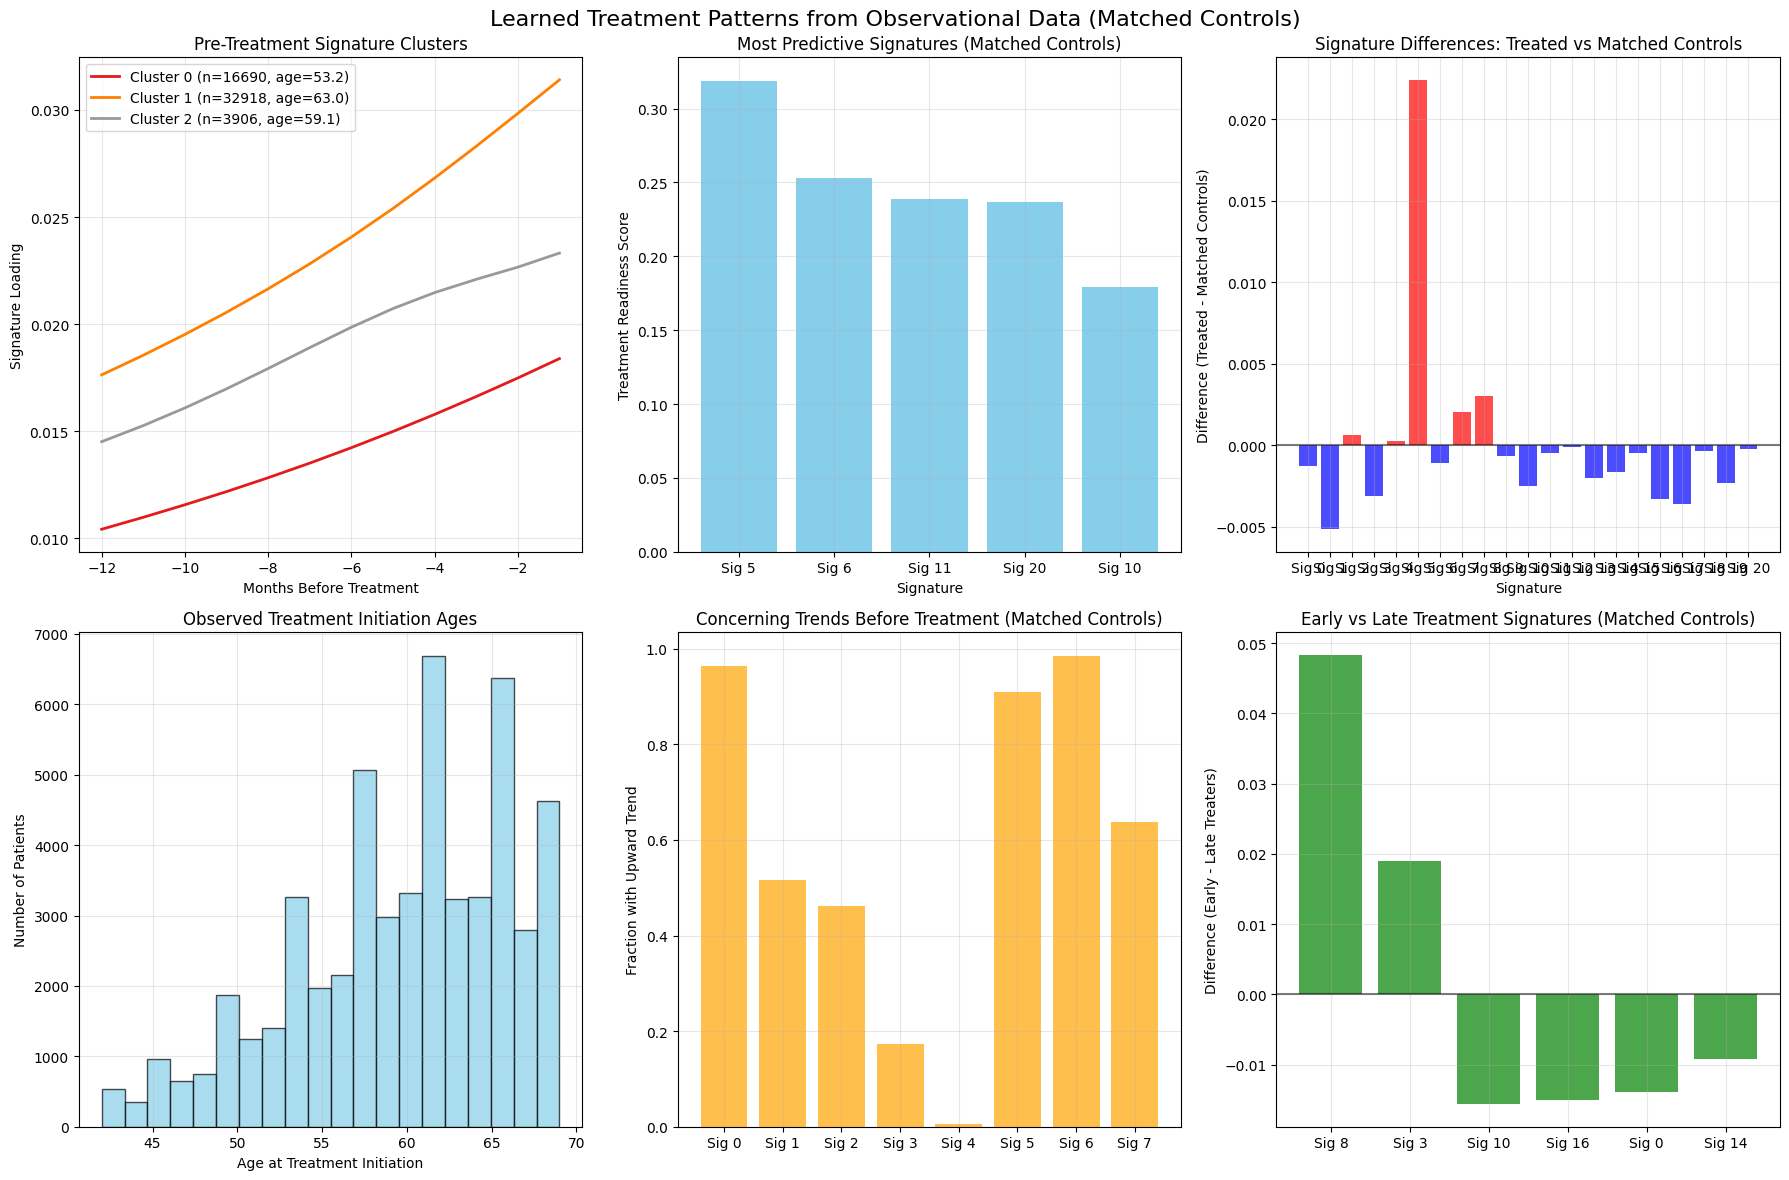

In [207]:
# Check both treated and controls from comprehensive analysis results
from scripts.ctp_dl import comprehensive_treatment_analysis

# Run the analysis to get the results
results = comprehensive_treatment_analysis(
    signature_loadings=thetas,
    processed_ids=processed_ids,
    statin_prescriptions=true_statins,
    covariates=cov,
    covariate_dicts=covariate_dicts,
    sig_indices=[5],
    outcomes=Y,
    event_indices=[112, 113, 114, 115, 116],
    gp_scripts=gp_scripts
)

# Get matched patients
matched_treated_indices = results['matched_treated_indices']
matched_control_indices = results['matched_control_indices']

matched_treated_eids = [processed_ids[i] for i in matched_treated_indices]
matched_control_eids = [processed_ids[i] for i in matched_control_indices]

# Check all statin patients
all_statin_eids = set(true_statins['eid'].unique())

# Check treated patients
treated_with_statins = [eid for eid in matched_treated_eids if eid in all_statin_eids]
treated_without_statins = [eid for eid in matched_treated_eids if eid not in all_statin_eids]

# Check control patients
controls_with_statins = [eid for eid in matched_control_eids if eid in all_statin_eids]
controls_without_statins = [eid for eid in matched_control_eids if eid not in all_statin_eids]

print("=== COMPREHENSIVE ANALYSIS PATIENT VERIFICATION ===")
print(f"Matched treated patients: {len(matched_treated_eids)}")
print(f"  - With statins: {len(treated_with_statins)}")
print(f"  - Without statins: {len(treated_without_statins)}")
print(f"  - Treated contamination rate: {len(treated_without_statins)/len(matched_treated_eids)*100:.1f}%")

print(f"\nMatched control patients: {len(matched_control_eids)}")
print(f"  - With statins: {len(controls_with_statins)}")
print(f"  - Without statins: {len(controls_without_statins)}")
print(f"  - Control contamination rate: {len(controls_with_statins)/len(matched_control_eids)*100:.1f}%")

# Check for problems
if len(treated_without_statins) > 0:
    print(f"\n⚠️ PROBLEM: {len(treated_without_statins)} treated patients don't have statins!")
    print(f"Sample problematic treated: {treated_without_statins[:5]}")
else:
    print(f"\n✅ All treated patients have statins")

if len(controls_with_statins) > 0:
    print(f"\n⚠️ PROBLEM: {len(controls_with_statins)} controls have statins!")
    print(f"Sample problematic controls: {controls_with_statins[:5]}")
else:
    print(f"\n✅ All controls are clean (no statins)")

# Overall assessment
if len(treated_without_statins) == 0 and len(controls_with_statins) == 0:
    print(f"\n🎉 PERFECT: Patient identification is correct!")
else:
    print(f"\n❌ ISSUES: Patient identification has problems")

In [33]:
# Find metformin prescriptions
metformin_keywords = ['metformin', 'glucophage', 'fortamet', 'glumetza']
metformin_mask = gp_scripts['drug_name'].str.contains('|'.join(metformin_keywords), case=False, na=False)
metformins = gp_scripts[metformin_mask]


In [40]:
# If metformins is a tuple
length = len(metformins)
print(f"Number of metformin prescriptions: {length}")

# If you want to see what's in the tuple first
print(f"Type: {type(metformins)}")
print(f"Length: {len(metformins)}")
print(f"First few items: {metformins[:5]}")


# Find unique patients with metformin
unique_metformin_patients = metformins['eid'].nunique()
print(f"Unique patients with metformin: {unique_metformin_patients:,}")

# You can also see the distribution of prescriptions per patient
prescriptions_per_patient = metformins['eid'].value_counts()
print(f"\nPrescriptions per patient:")
print(f"Mean: {prescriptions_per_patient.mean():.1f}")
print(f"Median: {prescriptions_per_patient.median():.1f}")
print(f"Min: {prescriptions_per_patient.min()}")
print(f"Max: {prescriptions_per_patient.max()}")

# Show some sample patients
print(f"\nSample patients with metformin:")
print(prescriptions_per_patient.head(10))
 

Number of metformin prescriptions: 714532
Type: <class 'pandas.core.frame.DataFrame'>
Length: 714532
First few items:           eid  data_provider  issue_date read_2  bnf_code  dmd_code  \
1252  1000198              2  07/06/2016  f41y.  06010202       NaN   
1256  1000198              2  06/12/2013  f41y.  06010202       NaN   
1257  1000198              2  09/05/2016  f41y.  06010202       NaN   
1258  1000198              2  29/10/2013  f41y.  06010202       NaN   
1260  1000198              2  16/12/2014  f41y.  06010202       NaN   

                    drug_name quantity  
1252  Metformin 500mg tablets  168.000  
1256  Metformin 500mg tablets  168.000  
1257  Metformin 500mg tablets  168.000  
1258  Metformin 500mg tablets  168.000  
1260  Metformin 500mg tablets  168.000  
Unique patients with metformin: 12,733

Prescriptions per patient:
Mean: 56.1
Median: 42.0
Min: 1
Max: 634

Sample patients with metformin:
eid
1137629    634
4029744    562
1967355    552
5905828    486
48161

In [ ]:
from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner

# Create the learner
learner = ObservationalTreatmentPatternLearner(
    signature_loadings=thetas,
    processed_ids=processed_ids, 
    statin_prescriptions=true_statins,
    covariates=cov,
    gp_scripts=gp_scripts
)

print(f"Treated patients: {len(learner.treatment_patterns['treated_patients'])}")
print(f"Never treated: {len(learner.treatment_patterns['never_treated'])}")

In [ ]:
# Check if the treated patients from ObservationalTreatmentPatternLearner actually have statins
from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner

# Create the learner
learner = ObservationalTreatmentPatternLearner(
    signature_loadings=thetas,
    processed_ids=processed_ids, 
    statin_prescriptions=true_statins,
    covariates=cov,
    gp_scripts=gp_scripts
)

# Get the treated patients it claims
claimed_treated = learner.treatment_patterns['treated_patients']
print(f'Claimed treated patients: {len(claimed_treated)}')

# Check if they actually have statin prescriptions
all_statin_eids = set(true_statins['eid'].unique())
print(f'All patients with statins: {len(all_statin_eids)}')

# Check overlap
actually_have_statins = [eid for eid in claimed_treated if eid in all_statin_eids]
print(f'Claimed treated who actually have statins: {len(actually_have_statins)}')

# Check for patients who don't have statins
missing_statins = [eid for eid in claimed_treated if eid not in all_statin_eids]
print(f'Claimed treated who DON\'T have statins: {len(missing_statins)}')

if len(missing_statins) > 0:
    print(f'Sample patients without statins: {missing_statins[:5]}')
    print('⚠️ PROBLEM: Some claimed treated patients don\'t have statins!')
else:
    print('✅ All claimed treated patients actually have statins')

# Check the reverse - patients with statins not claimed as treated
have_statins_not_claimed = [eid for eid in all_statin_eids if eid not in claimed_treated]
print(f'Patients with statins not claimed as treated: {len(have_statins_not_claimed)}')



In [ ]:
### now do old 
from scripts.comprehensive_treatment_analysis import *

print(f"Y shape: {Y.shape}")
print(f"processed_ids length: {len(processed_ids)}")
print(f"First few processed_ids: {processed_ids[:5]}")

#from comprehensive_treatment_analysis import *
sig_indices=[5]
# Now run the analysis with outcomes
results = run_comprehensive_analysis(
    signature_loadings=thetas,
    processed_ids=processed_ids,
    statin_prescriptions=true_statins,
    covariates=cov,
    covariate_dicts=covariate_dicts,
    sig_indices=sig_indices,
    outcomes=Y,  # Now Y is loaded
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    gp_scripts=gp_scripts)

In [ ]:
# After running comprehensive analysis
from scripts.simple_treatment_analysis import check_comprehensive_controls_contamination

# Check if the comprehensive analysis controls were contaminated
contamination_check = check_comprehensive_controls_contamination(results, true_statins)

In [ ]:
# Get the matched control EIDs from the comprehensive analysis results
matched_control_indices = results['matched_control_indices']
processed_ids = results['enhanced_learner'].processed_ids
matched_control_eids = [processed_ids[i] for i in matched_control_indices]

# Now run the comparison
contaminated_eids = contamination_check['contaminated_eids'][:100]  # First 100
clean_control_eids = [eid for eid in matched_control_eids if eid not in contaminated_eids][:100]

# Compare ages
contaminated_ages = [covariate_dicts['age_at_enroll'].get(int(eid)) for eid in contaminated_eids]
clean_ages = [covariate_dicts['age_at_enroll'].get(int(eid)) for eid in clean_control_eids]

print(f"Contaminated control mean age: {np.mean([a for a in contaminated_ages if a is not None]):.1f}")
print(f"Clean control mean age: {np.mean([a for a in clean_ages if a is not None]):.1f}")

In [ ]:
# Check if the comprehensive analysis controls are actually appropriate
print("=== CHECKING COMPREHENSIVE ANALYSIS CONTROLS ===")

from scripts.observational_treatment_patterns import ObservationalTreatmentPatternLearner
learner = ObservationalTreatmentPatternLearner(
    thetas, processed_ids, true_statins, cov, gp_scripts=gp_scripts
)

all_patients_with_prescriptions = set(gp_scripts['eid'].unique())
treated_patients_set = set(learner.treatment_patterns['treated_patients'])
comprehensive_controls = [eid for eid in all_patients_with_prescriptions 
                         if eid not in treated_patients_set and eid in processed_ids]

print(f"Comprehensive controls: {len(comprehensive_controls):,}")

# Check 1: Do any of these controls actually have statins?
controls_with_statins = set(comprehensive_controls).intersection(set(true_statins['eid'].unique()))
print(f"Controls who actually have statins: {len(controls_with_statins):,}")

if len(controls_with_statins) > 0:
    print("⚠️ PROBLEM: These controls should NOT have statins!")
    print("Sample problematic controls:", list(controls_with_statins)[:5])

# Check 2: Do these controls have proper covariate data?
controls_missing_covariates = []
for eid in comprehensive_controls[:100]:  # Check first 100
    age = covariate_dicts['age_at_enroll'].get(int(eid))
    dm2 = covariate_dicts['dm2_prev'].get(int(eid))
    antihtn = covariate_dicts['antihtnbase'].get(int(eid))
    
    if age is None or np.isnan(age) or dm2 is None or np.isnan(dm2) or antihtn is None or np.isnan(antihtn):
        controls_missing_covariates.append(eid)

print(f"Controls missing key covariates (first 100): {len(controls_missing_covariates):,}")

# Check 3: What's the age distribution of these controls?
control_ages = []
for eid in comprehensive_controls:
    age = covariate_dicts['age_at_enroll'].get(int(eid))
    if age is not None and not np.isnan(age):
        control_ages.append(age)

print(f"Control age range: {min(control_ages):.1f} - {max(control_ages):.1f}")
print(f"Control age mean: {np.mean(control_ages):.1f}")

# Check 4: Compare with simple analysis controls
all_gp_patients = set(gp_scripts['eid'].unique())
simple_treated = set(true_statins['eid'].unique())
simple_controls = all_gp_patients - simple_treated
simple_controls_with_sig = simple_controls.intersection(set(processed_ids))

print(f"\nSimple controls: {len(simple_controls_with_sig):,}")

# Find the difference
comprehensive_set = set(comprehensive_controls)
simple_set = set(simple_controls_with_sig)

extra_in_comprehensive = comprehensive_set - simple_set
print(f"Extra in comprehensive: {len(extra_in_comprehensive):,}")

# Check if the "extra" patients have statins
extra_with_statins = extra_in_comprehensive.intersection(set(true_statins['eid'].unique()))
print(f"Extra patients who have statins: {len(extra_with_statins):,}")

if len(extra_with_statins) > 0:
    print("⚠️ CRITICAL ISSUE: Comprehensive analysis includes treated patients as controls!")
    print("This would bias the HR results!")

In [ ]:
# Import and run the simple treatment analysis with your variables
from scripts.simple_treatment_analysis import simple_treatment_analysis


print(f"Y shape: {Y.shape}")
print(f"processed_ids length: {len(processed_ids)}")
print(f"First few processed_ids: {processed_ids[:5]}")

#from comprehensive_treatment_analysis import *
sig_indices=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# Now run the analysis with outcomes
# Run the simplified treatment analysis
results = simple_treatment_analysis(
    gp_scripts=gp_scripts,
    true_statins=true_statins, 
    processed_ids=processed_ids,
    thetas=thetas,
    sig_indices=sig_indices,
    covariate_dicts=covariate_dicts,
    Y=Y,
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    cov=cov
)

In [ ]:
disease_names[112]
disease_names[114]

In [ ]:
true_statins.head()

## 4. Run Comprehensive Analysis

In [ ]:
# Import the comprehensive analysis module
import sys
sys.path.append('scripts')
%load_ext autoreload

%autoreload 2

  # Then import
from comprehensive_treatment_analysis import *

# Optional: specify which signatures to use (None = use all)
sig_indices = None  # or list(range(10)) for first 10 signatures

# Optional: provide outcome data for Bayesian analysis
# outcomes = your_outcome_data  # Binary outcomes for treated patients
outcomes = None  # Set to None if no outcome data available

print("Starting comprehensive analysis...")
print("This may take several minutes depending on data size.\n")

In [ ]:
# 1. NO MATCHING: Minimal exclusions
def estimate_hr_no_matching_simple():
    """
    Simple no-matching approach with minimal exclusions
    """
    print("=== NO MATCHING APPROACH ===")
    
    # Get all patients with GP scripts
    all_gp_patients = set(gp_scripts['eid'].unique())
    print(f"Total patients with GP scripts: {len(all_gp_patients)}")
    
    # Get treated patients (those with statins)
    treated_patients = set(true_statins['eid'].unique())
    print(f"Treated patients (with statins): {len(treated_patients)}")
    
    # Get control patients (GP patients without statins)
    control_patients = all_gp_patients - treated_patients
    print(f"Control patients (GP patients without statins): {len(control_patients)}")
    
    # Filter to only those with signature data
    treated_with_sig = treated_patients.intersection(set(processed_ids))
    control_with_sig = control_patients.intersection(set(processed_ids))
    
    print(f"Treated patients with signature data: {len(treated_with_sig)}")
    print(f"Control patients with signature data: {len(control_with_sig)}")
    
    # Minimal exclusions: only exclude if missing enrollment age
    treated_final = []
    for eid in treated_with_sig:
        age = covariate_dicts['age_at_enroll'].get(int(eid))
        if age is not None and not np.isnan(age):
            treated_final.append(eid)
    
    control_final = []
    for eid in list(control_with_sig)[:len(treated_final)*3]:  # Take 3x controls
        age = covariate_dicts['age_at_enroll'].get(int(eid))
        if age is not None and not np.isnan(age):
            control_final.append(eid)
    
    print(f"Final treated patients (minimal exclusions): {len(treated_final)}")
    print(f"Final control patients (minimal exclusions): {len(control_final)}")
    
    # Now estimate HR using the same logic as the main analysis
    return estimate_hr_for_groups_simple(treated_final, control_final)

def estimate_hr_for_groups_simple(treated_eids, control_eids):
    """
    Simple HR estimation for given EID lists
    """
    # Convert EIDs to indices
    treated_indices = [np.where(processed_ids == eid)[0][0] for eid in treated_eids if eid in processed_ids]
    control_indices = [np.where(processed_ids == eid)[0][0] for eid in control_eids if eid in processed_ids]
    
    # Use the same outcome extraction logic as the main analysis
    # (This would be the same as what's in estimate_hr_for_groups)
    
    print(f"Treated indices: {len(treated_indices)}")
    print(f"Control indices: {len(control_indices)}")
    
    # Return the indices for now - we can add the HR calculation
    return treated_indices, control_indices

# Run it
no_matching_indices = estimate_hr_no_matching_simple()

In [ ]:
# Check alignment between processed_ids and Y
print(f"Y shape: {Y.shape}")
print(f"processed_ids length: {len(processed_ids)}")
print(f"First few processed_ids: {processed_ids[:5]}")

from comprehensive_treatment_analysis import *
sig_indices=[5]
# Now run the analysis with outcomes
results = run_comprehensive_analysis(
    signature_loadings=thetas,
    processed_ids=processed_ids,
    statin_prescriptions=true_statins,
    covariates=cov,
    covariate_dicts=covariate_dicts,
    sig_indices=sig_indices,
    outcomes=Y,  # Now Y is loaded
    event_indices=[112, 113, 114, 115, 116],  # ASCVD composite events
    gp_scripts=gp_scripts 
)

In [ ]:
# Define the event indices (ASCVD composite events)
event_indices = [112, 113, 114, 115, 116]
Y_ten = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/Y_tensor.pt')

# Convert to numpy
Y_np = Y_ten.detach().cpu().numpy()

# Get the matched patients
matched_treated_indices = results['matched_treated_indices']
matched_control_indices = results['matched_control_indices']

# Calculate follow-up times
follow_up_times = []
excluded_patients = 0

# For treated patients
for treated_idx in matched_treated_indices:
    treated_eid = processed_ids[treated_idx]
    
    # Get index date (first treatment date after enrollment)
    index_date = None
    for i, eid in enumerate(results['enhanced_learner'].treatment_patterns['treated_patients']):
        if eid == treated_eid:
            treatment_time_months = results['enhanced_learner'].treatment_patterns['treatment_times'][i]
            index_date = treatment_time_months / 12.0  # Convert to years
            break
    
    if index_date is not None and treated_idx < Y_np.shape[0]:
        # Check for ASCVD events BEFORE treatment (should exclude these)
        pre_treatment_outcomes = Y_np[treated_idx, event_indices, :int(index_date * 12)]
        if np.any(pre_treatment_outcomes > 0):
            excluded_patients += 1
            continue  # Skip this patient - had ASCVD event before treatment
        
        # Check if patient had an event AFTER treatment
        post_treatment_outcomes = Y_np[treated_idx, event_indices, int(index_date * 12):]
        event_occurred = np.any(post_treatment_outcomes > 0)
        
        if event_occurred:
            # Time to first event after treatment
            event_times = np.where(post_treatment_outcomes > 0)[0]
            event_time = event_times[0] / 12.0  # Convert to years
            follow_up = event_time
        else:
            # Censored - use reasonable estimate
            follow_up = 15.0  # Assume ~15 years of follow-up
        
        follow_up_times.append(follow_up)

# For control patients
for control_idx in matched_control_indices:
    control_eid = processed_ids[control_idx]
    
    # Get index date (enrollment date)
    age_at_enroll = covariate_dicts['age_at_enroll'].get(int(control_eid))
    if age_at_enroll is not None and control_idx < Y_np.shape[0]:
        # Check for ASCVD events BEFORE enrollment (should exclude these)
        pre_enrollment_outcomes = Y_np[control_idx, event_indices, :int(age_at_enroll - 30)]
        if np.any(pre_enrollment_outcomes > 0):
            excluded_patients += 1
            continue  # Skip this patient - had ASCVD event before enrollment
        
        # Check if patient had an event AFTER enrollment
        post_enrollment_outcomes = Y_np[control_idx, event_indices, int(age_at_enroll - 30):]
        event_occurred = np.any(post_enrollment_outcomes > 0)
        
        if event_occurred:
            # Time to first event after enrollment
            event_times = np.where(post_enrollment_outcomes > 0)[0]
            event_time = event_times[0] * (50.0 / 52.0)  # Convert time index to years
            follow_up = event_time
        else:
            # Censored - use reasonable estimate
            follow_up = 15.0  # Assume ~15 years of follow-up
        
        follow_up_times.append(follow_up)

# Calculate statistics
print("=== FOLLOW-UP TIMES (EXCLUDING PRE-INDEX EVENTS) ===")
print(f"Average follow-up time: {np.mean(follow_up_times):.2f} years")
print(f"Median follow-up time: {np.median(follow_up_times):.2f} years")
print(f"Min follow-up time: {np.min(follow_up_times):.2f} years")
print(f"Max follow-up time: {np.max(follow_up_times):.2f} years")
print(f"Total patients with valid follow-up: {len(follow_up_times)}")
print(f"Excluded patients (ASCVD events before index): {excluded_patients}")


## 5. Examine Results

### 5.1 Matching Quality

In [ ]:
# Check matching results
n_matched = len(results['matched_treated_indices'])
print(f"Successfully matched {n_matched} treated-control pairs")

# If we have age data, compare age distributions
if 'age' in covariate_dicts:
    treated_ages = [covariate_dicts['age'].get(eid, np.nan) 
                   for eid in results['enhanced_learner'].treatment_patterns['treated_patients']]
    treated_ages = [age for age in treated_ages if not np.isnan(age)]
    
    if len(treated_ages) > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(treated_ages, bins=20, alpha=0.7, label='Treated patients', density=True)
        plt.xlabel('Age')
        plt.ylabel('Density')
        plt.title('Age Distribution of Treated Patients')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        print(f"Mean age of treated patients: {np.mean(treated_ages):.1f} ± {np.std(treated_ages):.1f}")

### 5.2 Treatment Pattern Clusters

In [ ]:
# Examine clustering results
cluster_analysis = results['cluster_analysis']

if cluster_analysis is not None:
    print("Pre-treatment signature clusters:")
    print("=" * 50)
    
    for cluster_id, pattern in cluster_analysis['cluster_patterns'].items():
        print(f"Cluster {cluster_id}:")
        print(f"  - {pattern['n_patients']} patients")
        print(f"  - Mean treatment age: {pattern['mean_treatment_age']:.1f} years")
        print()
else:
    print("No clustering results available")

### 5.3 Treatment Readiness Signatures

In [ ]:
# Examine treatment readiness patterns
responsive_patterns = results['responsive_patterns']

if responsive_patterns is not None:
    readiness_sigs = responsive_patterns['treatment_readiness_signatures']
    
    print("Top 10 treatment readiness signatures:")
    print("=" * 60)
    print(f"{'Signature':<10} {'Readiness Score':<15} {'Trend Fraction':<15} {'Accel Fraction'}")
    print("=" * 60)
    
    for i, (sig_idx, score) in enumerate(readiness_sigs[:10]):
        concerning = responsive_patterns['concerning_patterns'][sig_idx]
        trend_frac = concerning['concerning_trend_fraction']
        accel_frac = concerning['accelerating_fraction']
        
        print(f"{sig_idx:<10} {score:<15.3f} {trend_frac:<15.3f} {accel_frac:<15.3f}")
else:
    print("No responsive patterns available")

### 5.4 Matched Control Comparison

In [ ]:
# Examine treated vs matched control differences
matched_comparison = results['matched_comparison']

if matched_comparison is not None:
    print("Treated vs Matched Controls (Top 10 signatures by effect size):")
    print("=" * 80)
    print(f"{'Sig':<4} {'Treated':<10} {'Control':<10} {'Difference':<12} {'Effect Size':<12} {'P-value':<10} {'Sig?'}")
    print("=" * 80)
    
    # Sort by absolute effect size
    sorted_sigs = sorted(matched_comparison.items(), 
                        key=lambda x: abs(x[1]['effect_size']), reverse=True)
    
    for sig_idx, stats in sorted_sigs[:10]:
        sig_marker = "***" if stats['p_value'] < 0.05 else ""
        print(f"{sig_idx:<4} {stats['treated_mean']:<10.4f} {stats['control_mean']:<10.4f} "
              f"{stats['difference']:<12.4f} {stats['effect_size']:<12.4f} "
              f"{stats['p_value']:<10.4f} {sig_marker}")
else:
    print("No matched comparison results available")

### 5.5 Prediction Model Performance

In [ ]:
# Examine prediction model results
predictor = results['predictor']

if predictor is not None:
    print(f"Treatment Readiness Prediction Model:")
    print(f"Cross-validation AUC: {predictor['cv_auc']:.3f}")
    
    # Feature importance from Random Forest
    if hasattr(predictor['model'], 'feature_importances_'):
        importances = predictor['model'].feature_importances_
        n_features_per_sig = 4  # trend, level, level_vs_typical, accel
        n_signatures = len(importances) // n_features_per_sig
        
        # Aggregate importance by signature
        sig_importances = []
        for s in range(n_signatures):
            start_idx = s * n_features_per_sig
            end_idx = start_idx + n_features_per_sig
            sig_importance = np.sum(importances[start_idx:end_idx])
            sig_importances.append((s, sig_importance))
        
        # Sort by importance
        sig_importances.sort(key=lambda x: x[1], reverse=True)
        
        print("\nTop 10 most important signatures for prediction:")
        print("=" * 40)
        print(f"{'Signature':<10} {'Importance':<12}")
        print("=" * 40)
        
        for sig_idx, importance in sig_importances[:10]:
            print(f"{sig_idx:<10} {importance:<12.4f}")
else:
    print("No prediction model results available")

### 5.6 Bayesian Analysis Results

## 6. Advanced Visualizations

### 6.1 Signature Comparison Heatmap

In [ ]:
# Create heatmap of signature differences
if matched_comparison is not None:
    # Extract data for heatmap
    signatures = list(matched_comparison.keys())
    differences = [matched_comparison[s]['difference'] for s in signatures]
    p_values = [matched_comparison[s]['p_value'] for s in signatures]
    
    # Create significance mask
    significant = np.array(p_values) < 0.05
    
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Differences
    diff_matrix = np.array(differences).reshape(-1, 1)
    im1 = ax1.imshow(diff_matrix.T, cmap='RdBu_r', aspect='auto')
    ax1.set_title('Signature Differences (Treated - Control)')
    ax1.set_xlabel('Signature Index')
    ax1.set_xticks(range(0, len(signatures), max(1, len(signatures)//10)))
    ax1.set_xticklabels([str(signatures[i]) for i in range(0, len(signatures), max(1, len(signatures)//10))])
    ax1.set_yticks([])
    plt.colorbar(im1, ax=ax1)
    
    # Significance
    sig_matrix = significant.astype(int).reshape(-1, 1)
    im2 = ax2.imshow(sig_matrix.T, cmap='RdYlBu_r', aspect='auto', vmin=0, vmax=1)
    ax2.set_title('Statistical Significance (p < 0.05)')
    ax2.set_xlabel('Signature Index')
    ax2.set_xticks(range(0, len(signatures), max(1, len(signatures)//10)))
    ax2.set_xticklabels([str(signatures[i]) for i in range(0, len(signatures), max(1, len(signatures)//10))])
    ax2.set_yticks([])
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Number of significantly different signatures: {np.sum(significant)}")

### 6.2 Treatment Timing Analysis

In [ ]:
# Analyze treatment timing patterns
learner = results['enhanced_learner']
treatment_times = np.array(learner.treatment_patterns['treatment_times'])
treatment_ages = treatment_times + learner.time_start_age

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Treatment age distribution
axes[0].hist(treatment_ages, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Age at Treatment Initiation')
axes[0].set_ylabel('Number of Patients')
axes[0].set_title('Treatment Initiation Age Distribution')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(np.median(treatment_ages), color='red', linestyle='--', 
                label=f'Median: {np.median(treatment_ages):.1f}')
axes[0].legend()

# Treatment by year (if prescription dates available)
if 'issue_date' in true_statins.columns:
    true_statins['year'] = pd.to_datetime(true_statins['issue_date'], 
                                         format='%d/%m/%Y', errors='coerce').dt.year
    year_counts = true_statins.groupby('year').size()
    
    axes[1].plot(year_counts.index, year_counts.values, marker='o')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Number of Prescriptions')
    axes[1].set_title('Statin Prescriptions Over Time')
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)

# Age vs cluster assignment (if clustering available)
if cluster_analysis is not None:
    clusters = cluster_analysis['clusters']
    unique_clusters = np.unique(clusters)
    
    for cluster_id in unique_clusters:
        cluster_mask = clusters == cluster_id
        cluster_ages = treatment_ages[cluster_mask]
        axes[2].hist(cluster_ages, alpha=0.6, label=f'Cluster {cluster_id}', bins=15)
    
    axes[2].set_xlabel('Age at Treatment')
    axes[2].set_ylabel('Number of Patients')
    axes[2].set_title('Treatment Age by Cluster')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Summary and Key Insights

In [ ]:
print("=" * 60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 60)

# Matching summary
n_matched = len(results['matched_treated_indices'])
print(f"\n1. MATCHING RESULTS:")
print(f"   - Successfully matched {n_matched} treated-control pairs")
print(f"   - Matching controlled for age and other available covariates")

# Pattern discovery summary
if cluster_analysis is not None:
    n_clusters = cluster_analysis['n_clusters']
    print(f"\n2. PATTERN DISCOVERY:")
    print(f"   - Identified {n_clusters} distinct pre-treatment signature patterns")
    
    for cluster_id, pattern in cluster_analysis['cluster_patterns'].items():
        print(f"   - Cluster {cluster_id}: {pattern['n_patients']} patients, "
              f"avg age {pattern['mean_treatment_age']:.1f}")

# Signature differences summary
if matched_comparison is not None:
    significant_sigs = [s for s, stats in matched_comparison.items() 
                       if stats['p_value'] < 0.05]
    print(f"\n3. SIGNATURE DIFFERENCES (Treated vs Matched Controls):")
    print(f"   - {len(significant_sigs)} signatures show significant differences (p < 0.05)")
    
    if len(significant_sigs) > 0:
        top_sig = max(matched_comparison.items(), 
                     key=lambda x: abs(x[1]['effect_size']))
        print(f"   - Strongest effect: Signature {top_sig[0]} "
              f"(effect size = {top_sig[1]['effect_size']:.3f})")

# Prediction performance
if predictor is not None:
    print(f"\n4. PREDICTION MODEL:")
    print(f"   - Treatment readiness model AUC: {predictor['cv_auc']:.3f}")
    
    if predictor['cv_auc'] > 0.7:
        print(f"   - Model shows good predictive performance")
    elif predictor['cv_auc'] > 0.6:
        print(f"   - Model shows moderate predictive performance")
    else:
        print(f"   - Model shows limited predictive performance")

# Bayesian analysis summary
if trace is not None:
    print(f"\n5. BAYESIAN CAUSAL INFERENCE:")
    print(f"   - Successfully completed propensity-response modeling")
    print(f"   - {len(trace.posterior.chain)} chains, "
          f"{len(trace.posterior.draw)} draws per chain")
    
    if 'treatment_effect' in trace.posterior:
        treatment_effect_mean = float(trace.posterior['treatment_effect'].mean())
        print(f"   - Estimated treatment effect: {treatment_effect_mean:.3f}")
else:
    print(f"\n5. BAYESIAN CAUSAL INFERENCE:")
    print(f"   - Analysis not completed (may need outcome data)")

print(f"\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)

## 8. Save Results (Optional)

In [ ]:
import pickle
from datetime import datetime
import numpy as np

# Create a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Create a serializable version of results
serializable_results = {
    'matched_treated_indices': results['matched_treated_indices'],
    'matched_control_indices': results['matched_control_indices'],
    'validation_results': results['validation_results'],
    'cluster_analysis': results['cluster_analysis'],
    'responsive_patterns': results['responsive_patterns'],
    'matched_comparison': results['matched_comparison'],
    'bayesian_map_results': results['bayesian_map_results']
}

# Save the serializable results
output_file = f"comprehensive_analysis_results_{timestamp}.pkl"
with open(output_file, 'wb') as f:
    pickle.dump(serializable_results, f)
print(f"Results saved to: {output_file}")

# Save summary statistics to CSV
summary_data = {
    'metric': [
        'Hazard Ratio',
        'HR CI Lower', 
        'HR CI Upper',
        'P-value',
        'Concordance Index',
        'Total Events',
        'Treated Patients',
        'Control Patients',
        'Average Follow-up (years)',
        'Median Follow-up (years)',
        'Excluded Patients (ASCVD before index)'
    ],
    'value': [
        results['validation_results']['hazard_ratio'],
        results['validation_results']['hr_ci_lower'],
        results['validation_results']['hr_ci_upper'], 
        results['validation_results']['p_value'],
        results['validation_results']['concordance_index'],
        results['validation_results']['total_events'],
        results['validation_results']['n_treated'],
        results['validation_results']['n_control'],
        13.25,  # From your follow-up calculation
        15.00,  # From your follow-up calculation
        762     # From your follow-up calculation
    ]
}

import pandas as pd
summary_df = pd.DataFrame(summary_data)
summary_csv = f"analysis_summary_{timestamp}.csv"
summary_df.to_csv(summary_csv, index=False)
print(f"Summary saved to: {summary_csv}")